In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

def load_ipython_extension(ip):
    display(Javascript(disable_js))
    print ("autoscrolling long output is disabled")
load_ipython_extension("")


from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [3]:
repo_path = os.path.abspath(os.path.join('../..'))
display(os.listdir(repo_path))

sys.path.insert(0, repo_path)

['.idea', 'data', 'examples', 'f1pm', 'notebooks', 'requirements.txt', 'venv']

In [4]:
from f1probabilitymodels.historical_data_processing.historical_data_processing_m1 import process_historical_historical_data_m1
from f1probabilitymodels.historical_data_processing.tools import compute_historical_sub_data_set
from f1probabilitymodels.probability_estimates.pe_historical_data import ProbabilityEstimateHistoricalData

# Historical data processing

In [5]:
df_data, df_data_all = process_historical_historical_data_m1()
display(df_data)

,raceId,race_name,driverRef,qualifying_position,grid,position,positionOrder,driver_standing_position,constructor_standing_position,round,year,url
0,18,Australian Grand Prix - 2008,hamilton,1.0,1,1,1,1.0,1.0,1,2008.0,http://en.wikipedia.org/wiki/2008_Australian_G...
1,18,Australian Grand Prix - 2008,heidfeld,5.0,5,2,2,2.0,3.0,1,2008.0,http://en.wikipedia.org/wiki/2008_Australian_G...
2,18,Australian Grand Prix - 2008,rosberg,7.0,7,3,3,3.0,2.0,1,2008.0,http://en.wikipedia.org/wiki/2008_Australian_G...
3,18,Australian Grand Prix - 2008,alonso,12.0,11,4,4,4.0,4.0,1,2008.0,http://en.wikipedia.org/wiki/2008_Australian_G...
4,18,Australian Grand Prix - 2008,kovalainen,3.0,3,5,5,5.0,1.0,1,2008.0,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...
25715,1089,Italian Grand Prix - 2022,kevin_magnussen,19.0,16,16,16,12.0,7.0,16,2022.0,http://en.wikipedia.org/wiki/2022_Italian_Gran...
25716,1089,Italian Grand Prix - 2022,ricciardo,8.0,4,\N,17,14.0,5.0,16,2022.0,http://en.wikipedia.org/wiki/2022_Italian_Gran...
25717,1089,Italian Grand Prix - 2022,stroll,18.0,12,\N,18,18.0,9.0,16,2022.0,http://en.wikipedia.org/wiki/2022_Italian_Gran...
25718,1089,Italian Grand Prix - 2022,alonso,10.0,6,\N,19,9.0,4.0,16,2022.0,http://en.wikipedia.org/wiki/2022_Italian_Gran...


# Probability estimates

## Grid Estimates

In [6]:
from ipywidgets import Layout, Dropdown, interact, SelectMultiple, Checkbox


driver_championship_standing_dp = SelectMultiple(options=list(range(1, 22)),
                                                 value=[1],
                                           description='Driver Championship standing',
                                           style={'description_width': 'initial'})

constructor_championship_standing_dp = Dropdown(options=[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                #  value=[None],
                                           description='Constructor Championship standing',
                                           style={'description_width': 'initial'})

ci_dp = Dropdown(options=[0.05, 0.10, 0.20, 0.40], description='ci', style={'description_width': 'initial'})

data_set_year_lower_threshold_dp = Dropdown(options=[2000, 2004, 2008, 2012, 2016, None],
                                            description='year lower threshold',
                                           style={'description_width': 'initial'})

data_set_year_upper_threshold_dp = Dropdown(options=[None, 2000, 2004, 2008, 2012, 2016, 2022],
                                            description='year upper threshold',
                                           style={'description_width': 'initial'})

data_set_round_lower_threshold_dp = Dropdown(options=[5, 10, 15, None],
                                            description='round lower threshold',
                                            style={'description_width': 'initial'})

data_set_round_upper_threshold_dp = Dropdown(options=[None, 10, 15],
                                            description='round upper threshold',
                                            style={'description_width': 'initial'})


# driver_championship_standing = HBox([Label('Driver Championship standing'), Dropdown(options=list(range(1, 22)))])



In [7]:
def compute_grid_estimate_fuct(driver_championship_standing,
                               constructor_championship_standing,
                               ci,
                               year_lower_threshold, year_upper_threshold,
                               round_lower_threshold, round_upper_threshold):
    
    subdatset_params_dict = dict(year_lower_threshold=year_lower_threshold, year_upper_threshold=year_upper_threshold,
                                 round_lower_threshold=round_lower_threshold, round_upper_threshold=round_upper_threshold)

    pehd = ProbabilityEstimateHistoricalData(df_data, subdatset_params_dict)
    grid_estimate = pehd.compute_grid_estimate(driver_championship_standing=driver_championship_standing, 
                                               constructor_championship_standing=constructor_championship_standing,
                                               ci=ci)
    
    # Outputs prints ---------------------------------------------
    print("=="*50)
    
    print("Inputs: \n", subdatset_params_dict, 
          "\n driver_championship_standing: ", driver_championship_standing,
         "\n constructor_championship_standing: ", constructor_championship_standing)
    
    print("=="*50)
    
    print("N: ", grid_estimate.data_set_length)
    print("dnf_prob: ", grid_estimate.dnf_prob)
    
    print("\n ")
    print("Prob of finishing 1st: ", grid_estimate.ci_position_probabilities.loc[1].to_dict())
    print("Prob finishing top 3:  ", grid_estimate.ci_cum_position_probabilities.loc[3].to_dict())
    print("Prob finishing top 5:  ", grid_estimate.ci_cum_position_probabilities.loc[5].to_dict())
    print("Prob finishing top 6:  ", grid_estimate.ci_cum_position_probabilities.loc[6].to_dict())
    print("=="*50)
    
    # Outputs plots ---------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

    grid_estimate.position_probabilities.plot.bar(x='Target Value', y='Number of Occurrences', ax=ax1)
    grid_estimate.cum_position_probabilities.plot.bar(x='Target Value', y='Number of Occurrences', ax=ax2)
    
    plt.show()
    
    # Outputs prints 2 ---------------------------------------------
    
    display_side_by_side(grid_estimate.ci_position_probabilities, 
                         grid_estimate.ci_cum_position_probabilities, 
                        titles=['ci_position_probabilities', 'ci_cum_position_probabilities'])
    
    

Inputs: 
 {'year_lower_threshold': 2000, 'year_upper_threshold': None, 'round_lower_threshold': 5, 'round_upper_threshold': None} 
 driver_championship_standing:  (1,) 
 constructor_championship_standing:  None
N:  334
dnf_prob:  0

 
Prob of finishing 1st:  {'Probability': 0.4041916167664671, 'CI_lower': 0.35156301725466976, 'CI_upper': 0.4568202162782644}
Prob finishing top 3:   {'Probability': 0.7784431137724551, 'CI_lower': 0.7339050918551929, 'CI_upper': 0.8229811356897173}
Prob finishing top 5:   {'Probability': 0.874251497005988, 'CI_lower': 0.8386929127285786, 'CI_upper': 0.9098100812833975}
Prob finishing top 6:   {'Probability': 0.9161676646706587, 'CI_lower': 0.8864463428867587, 'CI_upper': 0.9458889864545587}

Bet finishing 1st fair value:  [2.47407407 2.84444026 2.18904498]
Bet finishing top 3 fair value:  [1.28461538 1.362574   1.21509468]
Bet finishing top 5 fair value:  [1.14383562 1.19233153 1.09913049]
Bet finishing top 6 fair value:  [1.09150327 1.12809987 1.05720652

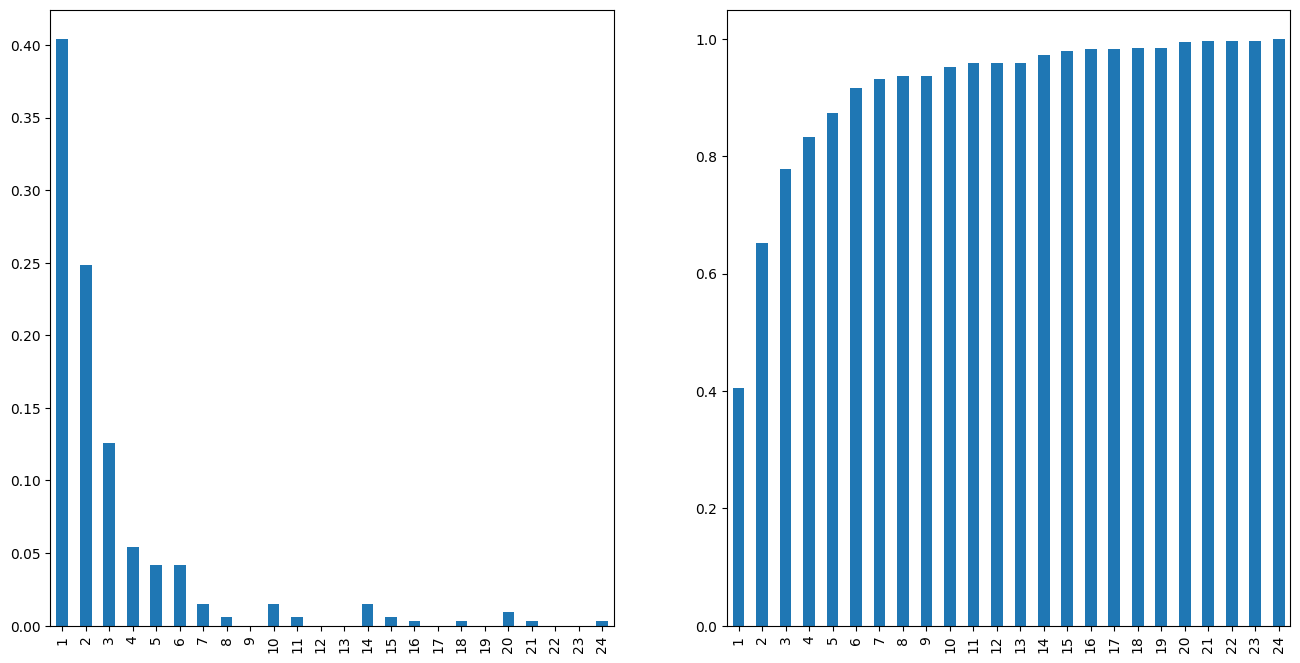

,Probability,CI_lower,CI_upper
1,0.404192,0.351563,0.456820
2,0.248503,0.202158,0.294848
3,0.125749,0.090190,0.161307
4,0.053892,0.029676,0.078109
5,0.041916,0.020425,0.063408
6,0.041916,0.020425,0.063408
7,0.014970,0.001947,0.027993
8,0.005988,-0.002286,0.014262
9,0.000000,0.000000,0.000000
10,0.014970,0.001947,0.027993


interactive(children=(SelectMultiple(description='Driver Championship standing', index=(0,), options=(1, 2, 3,…

In [8]:
_ = interact(compute_grid_estimate_fuct, 
             driver_championship_standing=driver_championship_standing_dp,
             constructor_championship_standing=constructor_championship_standing_dp,
             ci=ci_dp,
             year_lower_threshold=data_set_year_lower_threshold_dp, 
             year_upper_threshold=data_set_year_upper_threshold_dp,
             round_lower_threshold=data_set_round_lower_threshold_dp, 
             round_upper_threshold=data_set_round_upper_threshold_dp)

## Race Estimates

In [9]:
from ipywidgets import Layout, Dropdown, interact, SelectMultiple, Checkbox


driver_championship_standing_dp_re = SelectMultiple(options=list(range(1, 22)),
                                                    value=[1],
                                                   description='Driver Championship standing',
                                                   style={'description_width': 'initial'})

constructor_championship_standing_dp_re = Dropdown(options=[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                 # value=[None],
                                           description='Constructor Championship standing',
                                           style={'description_width': 'initial'})

ci_dp_re = Dropdown(options=[0.05, 0.10, 0.20, 0.40], description='ci', style={'description_width': 'initial'})

data_set_year_lower_threshold_dp_re = Dropdown(options=[2000, 2004, 2008, 2012, 2016, None],
                                            description='year lower threshold',
                                           style={'description_width': 'initial'})

data_set_year_upper_threshold_dp_re = Dropdown(options=[None, 2000, 2004, 2008, 2012, 2016, 2022],
                                            description='year upper threshold',
                                           style={'description_width': 'initial'})

data_set_round_lower_threshold_dp_re = Dropdown(options=[5, 10, 15, None],
                                            description='round lower threshold',
                                            style={'description_width': 'initial'})

data_set_round_upper_threshold_dp_re = Dropdown(options=[None, 10, 15],
                                            description='round upper threshold',
                                            style={'description_width': 'initial'})



In [10]:
def compute_race_estimate_fuct(driver_championship_standing,
                               constructor_championship_standing,
                               ci,
                               year_lower_threshold, year_upper_threshold,
                               round_lower_threshold, round_upper_threshold):
    
    subdatset_params_dict = dict(year_lower_threshold=year_lower_threshold, year_upper_threshold=year_upper_threshold,
                                 round_lower_threshold=round_lower_threshold, round_upper_threshold=round_upper_threshold)

    pehd = ProbabilityEstimateHistoricalData(df_data, subdatset_params_dict)
    race_estimate = pehd.compute_race_estimate(driver_championship_standing=driver_championship_standing, 
                                               constructor_championship_standing=constructor_championship_standing,
                                               ci=ci)
    
    # Outputs prints ---------------------------------------------
    print("=="*50)
    
    print("Inputs: \n", subdatset_params_dict, "\n driver_championship_standing: ", driver_championship_standing)
    
    print("=="*50)
    
    print("N: ", race_estimate.data_set_length)
    print("dnf_prob: ", race_estimate.dnf_prob)
    
    print("\n ")
    print("Prob of finishing 1st: ", race_estimate.ci_position_probabilities.loc[1].to_dict())
    print("Prob finishing top 3: ", race_estimate.ci_cum_position_probabilities.loc[3].to_dict())
    print("Prob finishing top 5: ", race_estimate.ci_cum_position_probabilities.loc[5].to_dict())
    print("Prob finishing top 6: ", race_estimate.ci_cum_position_probabilities.loc[6].to_dict())
    
    print("=="*50)
    
    # Outputs plots ---------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

    race_estimate.position_probabilities.plot.bar(x='Target Value', y='Number of Occurrences', ax=ax1)
    race_estimate.cum_position_probabilities.plot.bar(x='Target Value', y='Number of Occurrences', ax=ax2)
    
    plt.show()
    
    # Outputs prints 2 ---------------------------------------------
    
    display_side_by_side(race_estimate.ci_position_probabilities, 
                         race_estimate.ci_cum_position_probabilities, 
                        titles=['ci_position_probabilities', 'ci_cum_position_probabilities'])
    
    

Inputs: 
 {'year_lower_threshold': 2000, 'year_upper_threshold': None, 'round_lower_threshold': 5, 'round_upper_threshold': None} 
 driver_championship_standing:  (1,)
N:  334
dnf_prob:  0.0688622754491018

 
Prob of finishing 1st:  {'Probability': 0.48502994011976047, 'CI_lower': 0.4314317504129923, 'CI_upper': 0.5386281298265286}
Prob finishing top 3:  {'Probability': 0.7754491017964072, 'CI_lower': 0.7306974670377231, 'CI_upper': 0.8202007365550914}
Prob finishing top 5:  {'Probability': 0.8592814371257486, 'CI_lower': 0.8219892145046571, 'CI_upper': 0.89657365974684}
Prob finishing top 6:  {'Probability': 0.874251497005988, 'CI_lower': 0.8386929127285786, 'CI_upper': 0.9098100812833975}

Bet finishing 1st fair value:  [2.0617284  2.31786372 1.85656846]
Bet finishing top 3 fair value:  [1.28957529 1.36855545 1.21921373]
Bet finishing top 5 fair value:  [1.16376307 1.21656097 1.11535733]
Bet finishing top 6 fair value:  [1.14383562 1.19233153 1.09913049]


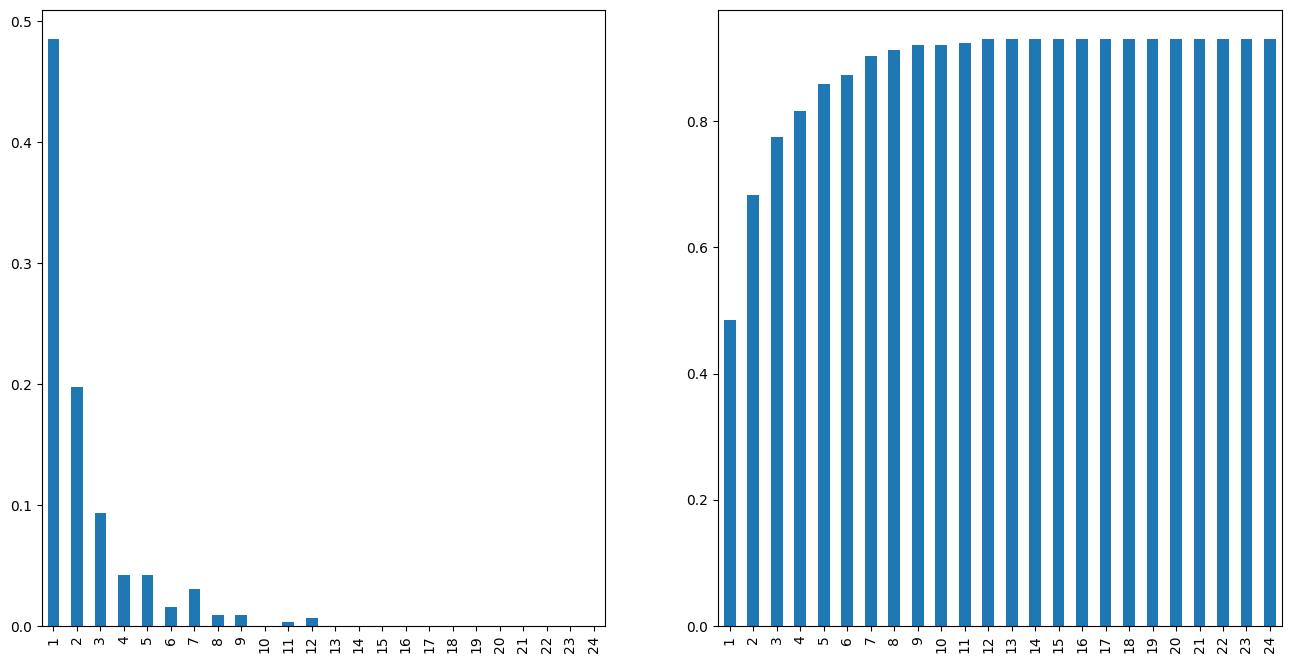

,Probability,CI_lower,CI_upper
1,0.485030,0.431432,0.538628
2,0.197605,0.154901,0.240309
3,0.092814,0.061695,0.123934
4,0.041916,0.020425,0.063408
5,0.041916,0.020425,0.063408
6,0.014970,0.001947,0.027993
7,0.029940,0.011663,0.048217
8,0.008982,-0.001136,0.019100
9,0.008982,-0.001136,0.019100
10,0.000000,0.000000,0.000000


interactive(children=(SelectMultiple(description='Driver Championship standing', index=(0,), options=(1, 2, 3,…

In [11]:
_ = interact(compute_race_estimate_fuct, 
             driver_championship_standing=driver_championship_standing_dp_re,
             constructor_championship_standing=constructor_championship_standing_dp_re,
             ci=ci_dp_re,
             year_lower_threshold=data_set_year_lower_threshold_dp_re, 
             year_upper_threshold=data_set_year_upper_threshold_dp_re,
             round_lower_threshold=data_set_round_lower_threshold_dp_re, 
             round_upper_threshold=data_set_round_upper_threshold_dp_re)

## Race Estimates conditioning of grid

In [12]:
from ipywidgets import Layout, Dropdown, interact, SelectMultiple, Checkbox


grid_standing_dp_cog = SelectMultiple(options=list(range(1, 22)),
                                      value=[1],
                                      description='grid',
                                      style={'description_width': 'initial'})

driver_championship_standing_dp_cog = SelectMultiple(options=list(range(1, 22)),
                                                     value=[1],
                                           description='Driver Championship standing',
                                           style={'description_width': 'initial'})

constructor_championship_standing_dp_cog = Dropdown(options=[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                 # value=[None],
                                           description='Constructor Championship standing',
                                           style={'description_width': 'initial'})

ci_dp_cog = Dropdown(options=[0.05, 0.10, 0.20, 0.32, 0.40], description='ci', style={'description_width': 'initial'})

data_set_year_lower_threshold_dp_cog = Dropdown(options=[2000, 2004, 2008, 2012, 2016, None],
                                            description='year lower threshold',
                                           style={'description_width': 'initial'})

data_set_year_upper_threshold_dp_cog = Dropdown(options=[None, 2000, 2004, 2008, 2012, 2016, 2022],
                                            description='year upper threshold',
                                           style={'description_width': 'initial'})

data_set_round_lower_threshold_dp_cog = Dropdown(options=[5, 10, 15, None],
                                            description='round lower threshold',
                                            style={'description_width': 'initial'})

data_set_round_upper_threshold_dp_cog = Dropdown(options=[None, 10, 15],
                                            description='round upper threshold',
                                            style={'description_width': 'initial'})


# driver_championship_standing = HBox([Label('Driver Championship standing'), Dropdown(options=list(range(1, 22)))])



In [13]:
def compute_conditioning_on_grid_race_estimate_fuct(grid,
                                                    driver_championship_standing,
                                                    constructor_championship_standing,
                               ci,
                               year_lower_threshold, year_upper_threshold,
                               round_lower_threshold, round_upper_threshold):
    
    subdatset_params_dict = dict(year_lower_threshold=year_lower_threshold, year_upper_threshold=year_upper_threshold,
                                 round_lower_threshold=round_lower_threshold, round_upper_threshold=round_upper_threshold)

    pehd = ProbabilityEstimateHistoricalData(df_data, subdatset_params_dict)
    race_estimate = pehd.compute_conditioning_on_grid_race_estimate(grid=grid,
                                                                    driver_championship_standing=driver_championship_standing, 
                                                                    constructor_championship_standing=constructor_championship_standing,
                                                                    ci=ci)
    
    # Outputs prints ---------------------------------------------
    print("=="*50)
    
    print("Inputs: \n", subdatset_params_dict, 
          "\n driver_championship_standing: ", driver_championship_standing,
         "\n grid: ", grid)
    
    print("=="*50)
    
    print("N: ", race_estimate.data_set_length)
    print("dnf_prob: ", race_estimate.dnf_prob)
    
    print("\n ")
    print("Prob of finishing 1st: ", race_estimate.ci_position_probabilities.loc[1].to_dict())
    print("Prob finishing top 3: ", race_estimate.ci_cum_position_probabilities.loc[3].to_dict())
    print("Prob finishing top 5: ", race_estimate.ci_cum_position_probabilities.loc[5].to_dict())
    print("Prob finishing top 6: ", race_estimate.ci_cum_position_probabilities.loc[6].to_dict())
    
    print("\nBet finishing 1st fair value: ", 1/race_estimate.ci_position_probabilities.loc[1].values)
    print("Bet finishing top 3 fair value: ", 1/race_estimate.ci_cum_position_probabilities.loc[3].values)
    print("Bet finishing top 5 fair value: ", 1/race_estimate.ci_cum_position_probabilities.loc[5].values)
    print("Bet finishing top 6 fair value: ", 1/race_estimate.ci_cum_position_probabilities.loc[6].values)
    
    print("=="*50)
    
    # Outputs plots ---------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

    race_estimate.position_probabilities.plot.bar(x='Target Value', y='Number of Occurrences', ax=ax1)
    race_estimate.cum_position_probabilities.plot.bar(x='Target Value', y='Number of Occurrences', ax=ax2)
    
    plt.show()
    
    # Outputs prints 2 ---------------------------------------------
    
    display_side_by_side(race_estimate.ci_position_probabilities, 
                         race_estimate.ci_cum_position_probabilities, 
                        titles=['ci_position_probabilities', 'ci_cum_position_probabilities'])
    
    

Inputs: 
 {'year_lower_threshold': 2000, 'year_upper_threshold': None, 'round_lower_threshold': 5, 'round_upper_threshold': None} 
 driver_championship_standing:  (1,) 
 grid:  (1,)
N:  135
dnf_prob:  0.05185185185185185

 
Prob of finishing 1st:  {'Probability': 0.6814814814814815, 'CI_lower': 0.6028899811324546, 'CI_upper': 0.7600729818305083}
Prob finishing top 3:  {'Probability': 0.8962962962962963, 'CI_lower': 0.8448677626998752, 'CI_upper': 0.9477248298927173}
Prob finishing top 5:  {'Probability': 0.9185185185185185, 'CI_lower': 0.87237033368156, 'CI_upper': 0.964666703355477}
Prob finishing top 6:  {'Probability': 0.9259259259259259, 'CI_lower': 0.8817482927477245, 'CI_upper': 0.9701035591041274}

Bet finishing 1st fair value:  [1.4673913  1.65867742 1.31566313]
Bet finishing top 3 fair value:  [1.11570248 1.18361718 1.0551586 ]
Bet finishing top 5 fair value:  [1.08870968 1.14630216 1.03662747]
Bet finishing top 6 fair value:  [1.08       1.1341105  1.03081778]


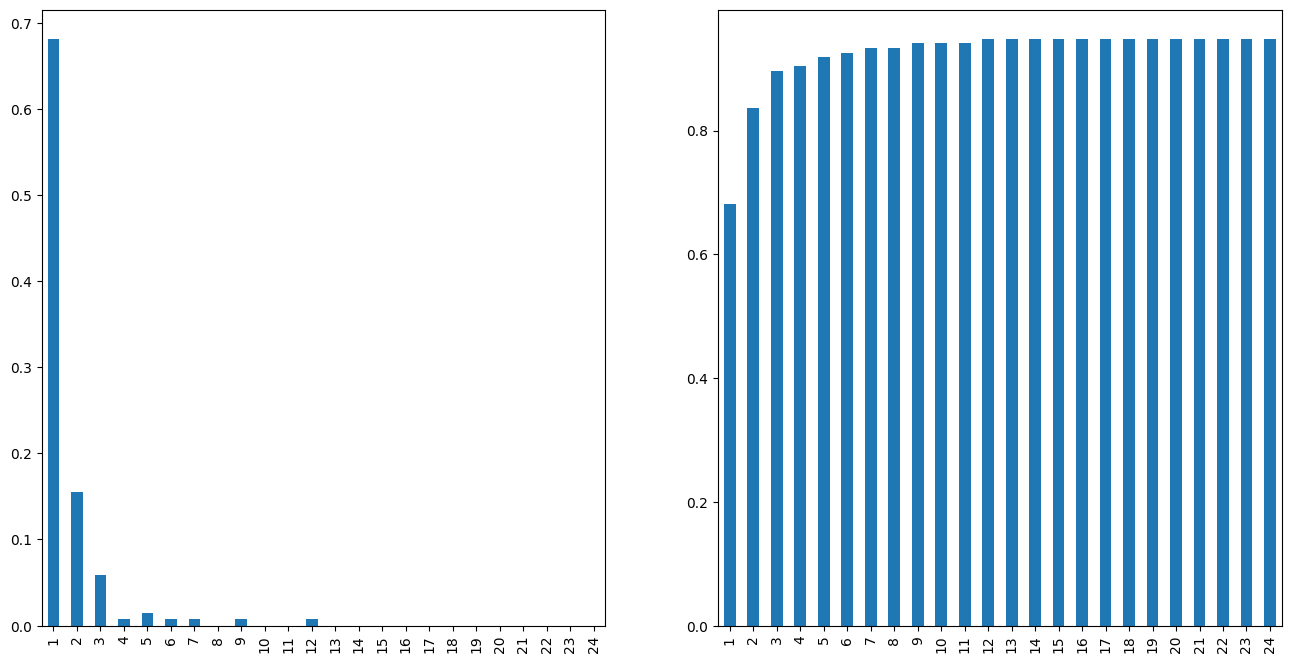

,Probability,CI_lower,CI_upper
1,0.681481,0.602890,0.760073
2,0.155556,0.094418,0.216693
3,0.059259,0.019431,0.099088
4,0.007407,-0.007057,0.021872
5,0.014815,-0.005564,0.035194
6,0.007407,-0.007057,0.021872
7,0.007407,-0.007057,0.021872
8,0.000000,0.000000,0.000000
9,0.007407,-0.007057,0.021872
10,0.000000,0.000000,0.000000


interactive(children=(SelectMultiple(description='grid', index=(0,), options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1…

In [14]:
_ = interact(compute_conditioning_on_grid_race_estimate_fuct, 
             grid=grid_standing_dp_cog,
             driver_championship_standing=driver_championship_standing_dp_cog,
             constructor_championship_standing=constructor_championship_standing_dp_cog,
             ci=ci_dp_cog,
             year_lower_threshold=data_set_year_lower_threshold_dp_cog, 
             year_upper_threshold=data_set_year_upper_threshold_dp_cog,
             round_lower_threshold=data_set_round_lower_threshold_dp_cog, 
             round_upper_threshold=data_set_round_upper_threshold_dp_cog)